## Importing The Libraries

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.preprocessing import (
     StandardScaler, OneHotEncoder
)

from sklearn.model_selection import train_test_split 
from sklearn.metrics import (
     confusion_matrix, classification_report 
)
# so we can play the audio files
from IPython.display import Audio 
import librosa 
import librosa.display
import soundfile as sf

In [3]:
import tensorflow as tf 
from tensorflow import keras

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import (
     Conv1D, Dense, MaxPooling1D, Flatten,
     Dropout, BatchNormalization, LSTM 
)

from tensorflow.keras.callbacks import (
     EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
) 



from tensorflow.keras.utils import to_categorical

2025-12-08 15:28:47.556162: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765207727.577248      96 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765207727.583647      96 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [4]:
import os 
import sys
import warnings 
if not sys.warnoptions: 
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
import torchaudio 
import torchaudio.transforms as T
import torch

## Loading Datasets

In [6]:
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "/kaggle/input/speech-emotion-recognition-en/Crema/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/speech-emotion-recognition-en/Savee/"

## Ravdess Dataset

In [7]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []

for dir in ravdess_directory_list : 
    actor = os.listdir(Ravdess +  dir) 

    for file in actor : 
        part = file.split ('.')[0]
        part = part.split('-') 
             
   
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1) 

Ravdess_df.Emotions.replace({
    1:'neutral',
    2:'neutral',
    3:'happy',
    4:'sad',
    5:'angry',
    6:'fear',
    7:'disgust',
    8:'surprise',
    # Note: the 1-natural and 2-calm are merged into "Natural" becuse they sound identical.
    
},inplace=True) 
Ravdess_df.head(10)
Ravdess_df.Emotions.value_counts()

Emotions
neutral     288
surprise    192
disgust     192
fear        192
sad         192
happy       192
angry       192
Name: count, dtype: int64

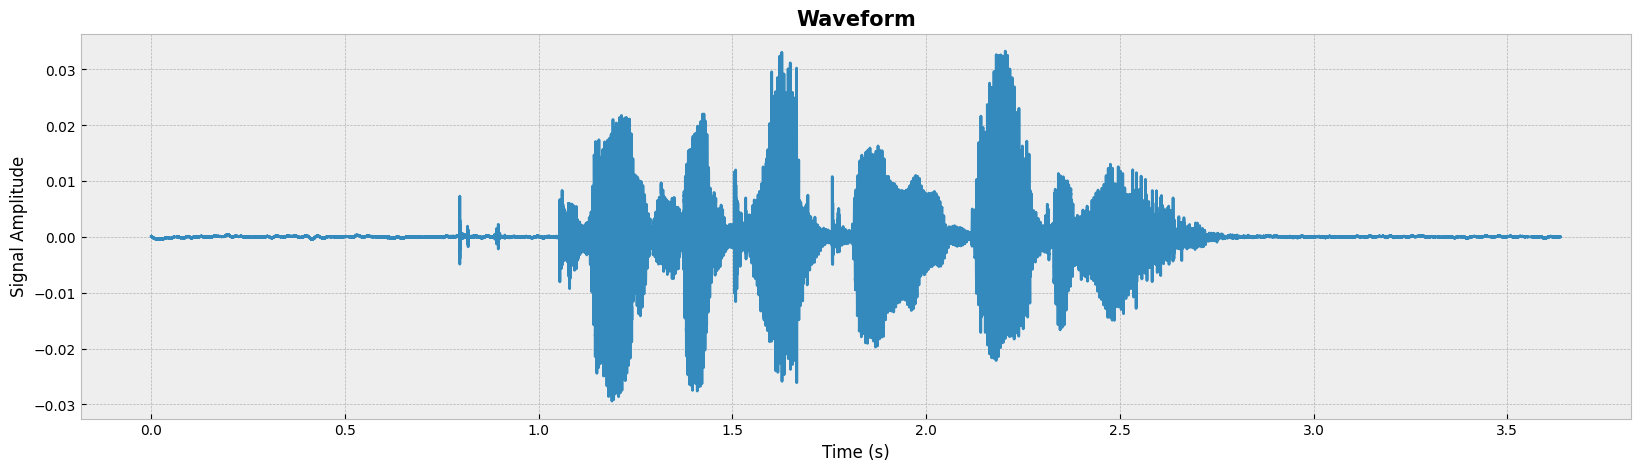

In [8]:
f_name = "/kaggle/input/speech-emotion-recognition-en/Ravdess/audio_speech_actors_01-24/Actor_08/03-01-01-01-01-02-08.wav"
plt.style.use('bmh')


data, sampling_rate = sf.read(f_name)
plt.figure(figsize=(20,5))

plt.plot(
    np.linspace(0, len(data)/sampling_rate, len(data)), data,
   
)

plt.xlabel("Time (s)")
plt.ylabel("Signal Amplitude")
plt.title("Waveform", weight='bold', fontsize=15)

Audio(f_name)

## Creame Dataset

In [9]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:


    file_path.append(Crema + file)
    
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
Crema_df.Emotions.value_counts()

Emotions
disgust    1271
happy      1271
sad        1271
fear       1271
angry      1271
neutral    1087
Name: count, dtype: int64

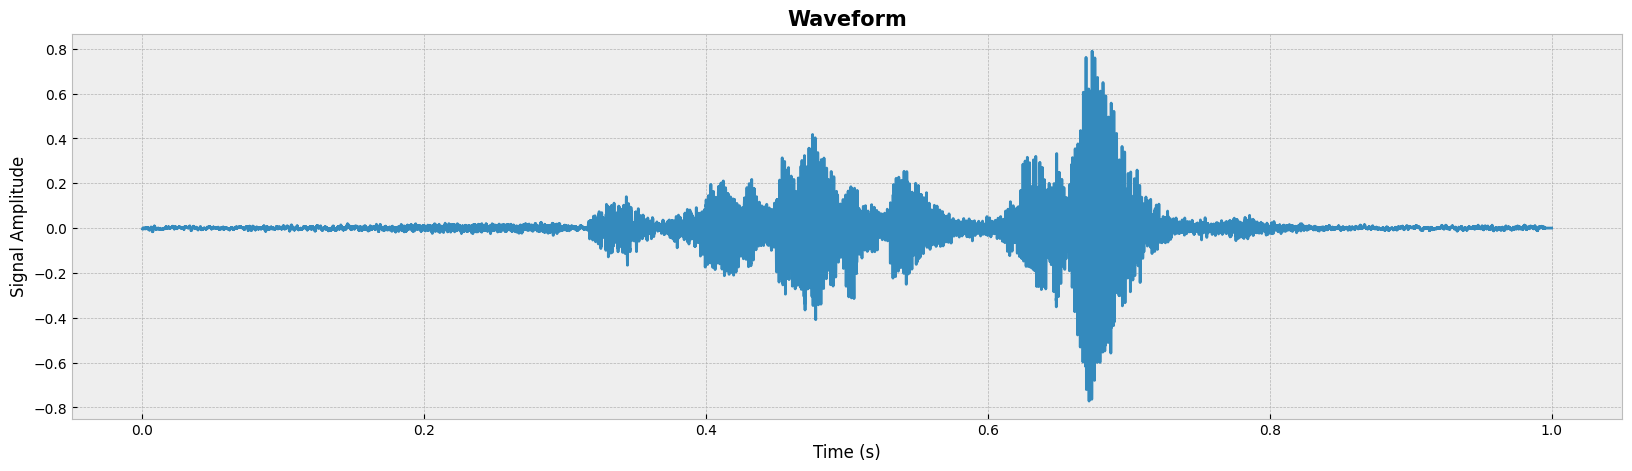

In [10]:
f_name = Crema + "1076_IEO_FEA_HI.wav"

data, sampling_rate = sf.read(f_name)

plt.figure(figsize=(20,5))

plt.plot(
    np.linspace(0, len(data)//sampling_rate, len(data)),data)
plt.xlabel("Time (s)")
plt.ylabel("Signal Amplitude")
plt.title("Waveform", weight='bold', fontsize=15)

Audio(f_name)


## Savee Dataset

In [11]:
savee_directory_list = os.listdir(Savee) 

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part [:-6]
    if ele=='a': 
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

emotion_df = pd.DataFrame(file_emotion, columns=["Emotions"])
path_df = pd.DataFrame(file_path, columns = ['Path'])

Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
Savee_df.Emotions.value_counts()

Emotions
neutral     120
fear         60
happy        60
disgust      60
angry        60
surprise     60
sad          60
Name: count, dtype: int64

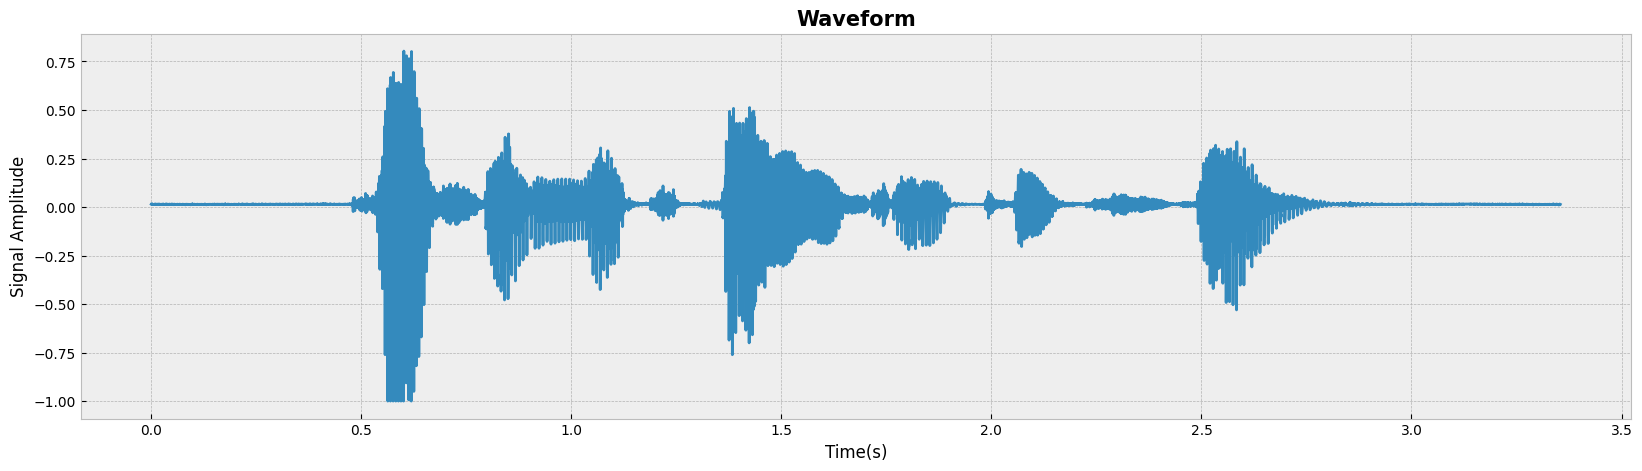

In [12]:
f_name = Savee + 'JK_n05.wav' 

data, sampling_rate = sf.read(f_name)

plt.figure(figsize= (20, 5))
plt.plot(
    np.linspace(0, len(data)/sampling_rate, len(data)), data)
plt.xlabel('Time(s)')
plt.ylabel('Signal Amplitude')
plt.title("Waveform", weight='bold', fontsize=15)

Audio(f_name)

## Tess Dataset

In [13]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
Tess_df.Emotions.value_counts()

Emotions
fear        400
angry       400
disgust     400
neutral     400
sad         400
surprise    400
happy       400
Name: count, dtype: int64

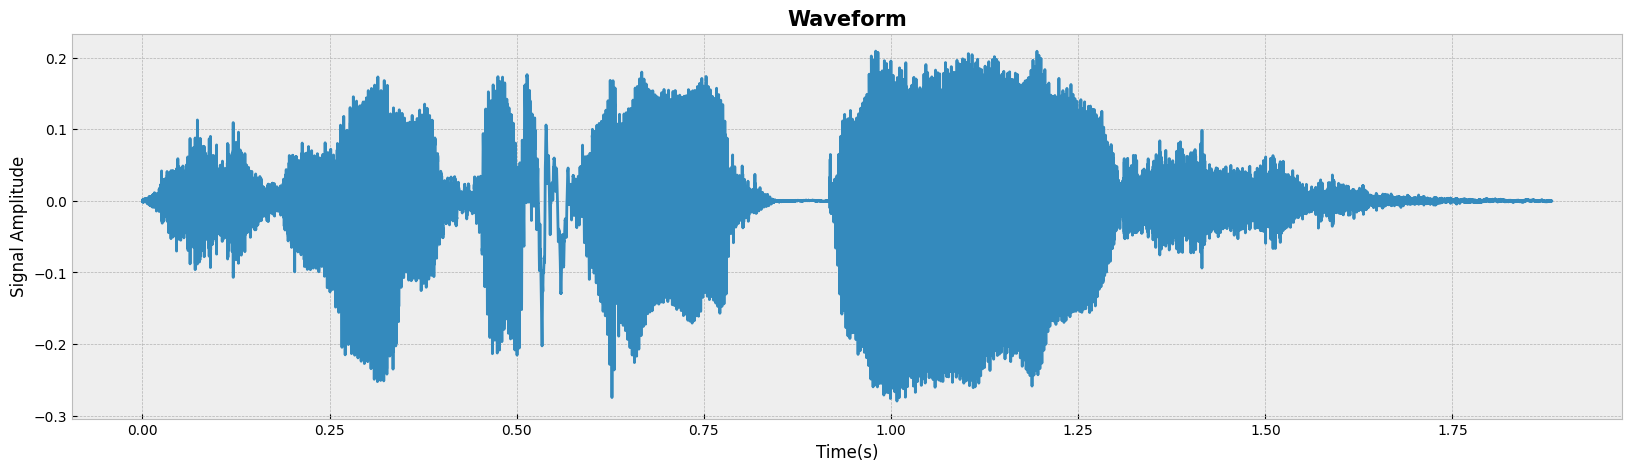

In [14]:
f_name = '../input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_base_fear.wav'


data, sampling_rate = sf.read(f_name)

plt.figure(figsize= (20, 5))
plt.plot(
    np.linspace(0, len(data)/sampling_rate, len(data)), data)
plt.xlabel('Time(s)')
plt.ylabel('Signal Amplitude')
plt.title("Waveform", weight='bold', fontsize=15)

Audio(f_name) 

## Combining All 4 SER Datasets Into ser_path

In [15]:
ser_path = pd.concat([Ravdess_df, Crema_df, Savee_df, Tess_df], axis=0)

ser_path.to_csv("ser_path.csv",index=False) 

ser_path.head()
ser_path.Emotions.value_counts()

Emotions
disgust     1923
sad         1923
fear        1923
happy       1923
angry       1923
neutral     1895
surprise     652
Name: count, dtype: int64

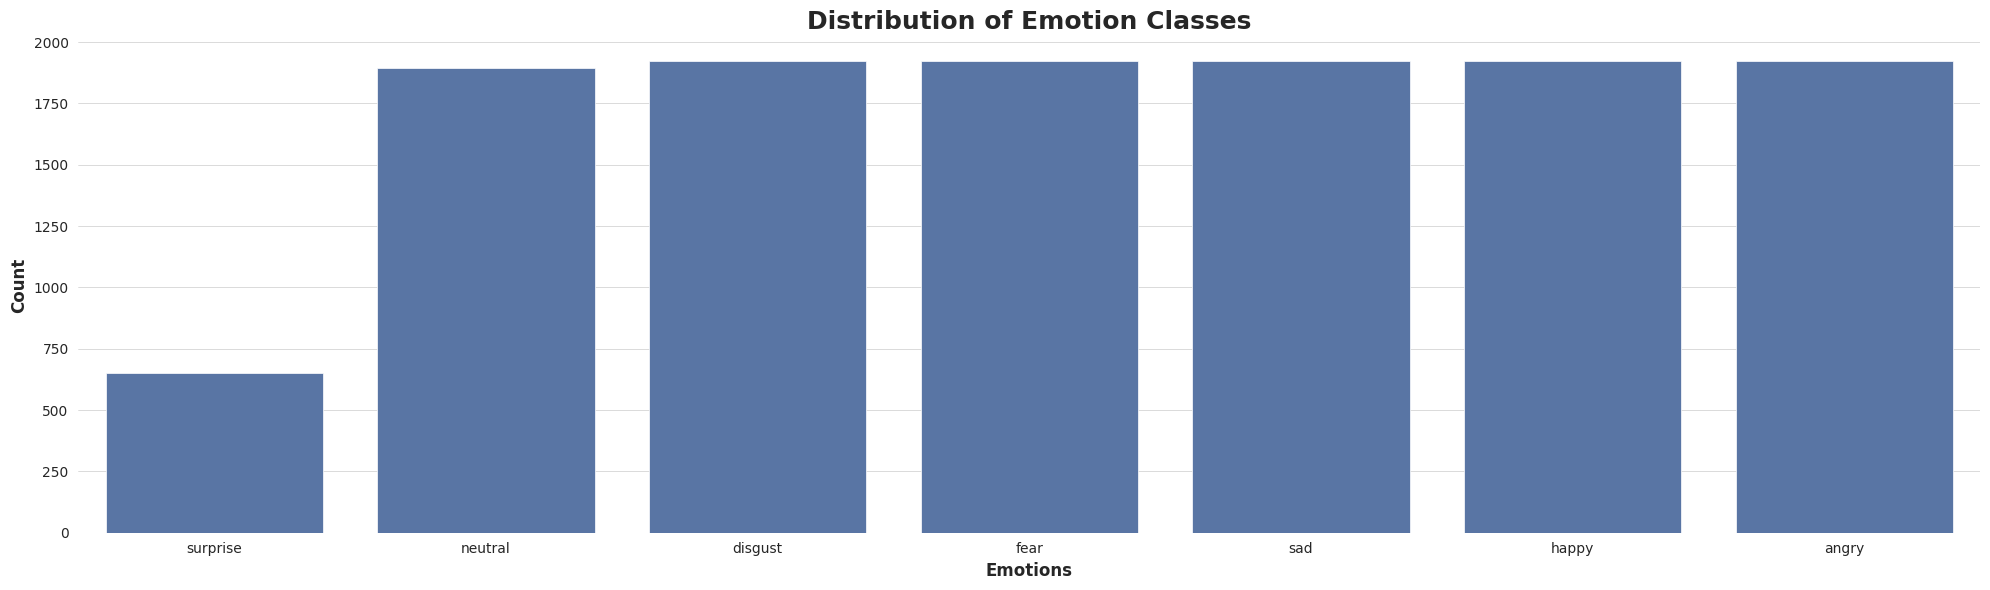

In [16]:
plt.figure(figsize=(20,6))
sns.set_style("whitegrid")

sns.countplot(data=ser_path, x='Emotions', color="#4C72B0")

plt.title('Distribution of Emotion Classes', fontsize=18, weight='bold')
plt.xlabel('Emotions', fontsize=12, weight='bold')
plt.ylabel('Count', fontsize=12, weight='bold')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Visualizing The Audio Data 
### to better understand the characteristics of our SER Dataset, we must visualize the audio signals using three complementary techniques:



## Waveform captures how the sound amplitude changes over time

In [17]:
def create_waveplot(data, sr, emotion):
    plt.style.use('bmh')
    plt.figure(figsize=(20, 5))
    plt.title("Waveform of Audio ({})".format(emotion), fontsize=15, weight='bold')
    librosa.display.waveshow(data, sr=sr)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

## Spectrum captures how the sound energy is distributed across frequencies

In [18]:
def create_spectrogram(data, sr, emotion):
    plt.style.use('bmh')
    
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))

    plt.figure(figsize=(20, 5))
    plt.title("Spectrogram of Audio ({})".format(emotion), fontsize=15, weight='bold')
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format="%+2.0f dB")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()

## MFCC (Mel-Frequency Cepstral Coefficients) captures the spectral shape of the sound on the mel scale approximating human hearing

In [19]:
def create_mfcc(data, sr, emotion):
    plt.style.use('bmh')
    
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)

    plt.figure(figsize=(20, 5))
    plt.title("MFCCs of Audio ({})".format(emotion), fontsize=15, weight='bold')
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel("MFCC Coefficients")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

## Zero Crossing Rate (ZRC) 
#### counts how many times the signal changes sign (from + to − or − to +) and It measures the speed and sharpness of changes in audio

## Root Mean Square Energy (RMSE) yep this one refers to energy not error

#### measures the average energy or loudness of the audio signal over time


# ## RMS Energy = (1/N ∑x[n]^2)^1/2

In [20]:
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(
        y=data,
        frame_length = frame_length,
        hop_length = hop_length
    )

    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(
        y=data,
        frame_length = frame_length,
        hop_length = hop_length
    )

    return np.squeeze(rmse)


def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_f = librosa.feature.mfcc(
        y=data,
        sr = sr
    )

    return np.squeeze(mfcc_f.T)  if not flatten else np.ravel(mfcc_f.T) 

In [21]:
f_name = Savee +'JK_n05.wav' 

data, sampling_rate = librosa.load(f_name, duration= 2.5, offset = 0.6)

print("ZCR : ",zcr(data).shape[0])
print("RMS :",rmse(data).shape[0])
print("MFCC: ",mfcc(data, sampling_rate).shape[0])


ZCR :  108
RMS : 108
MFCC:  2160


### Emotion Expression Visualization 

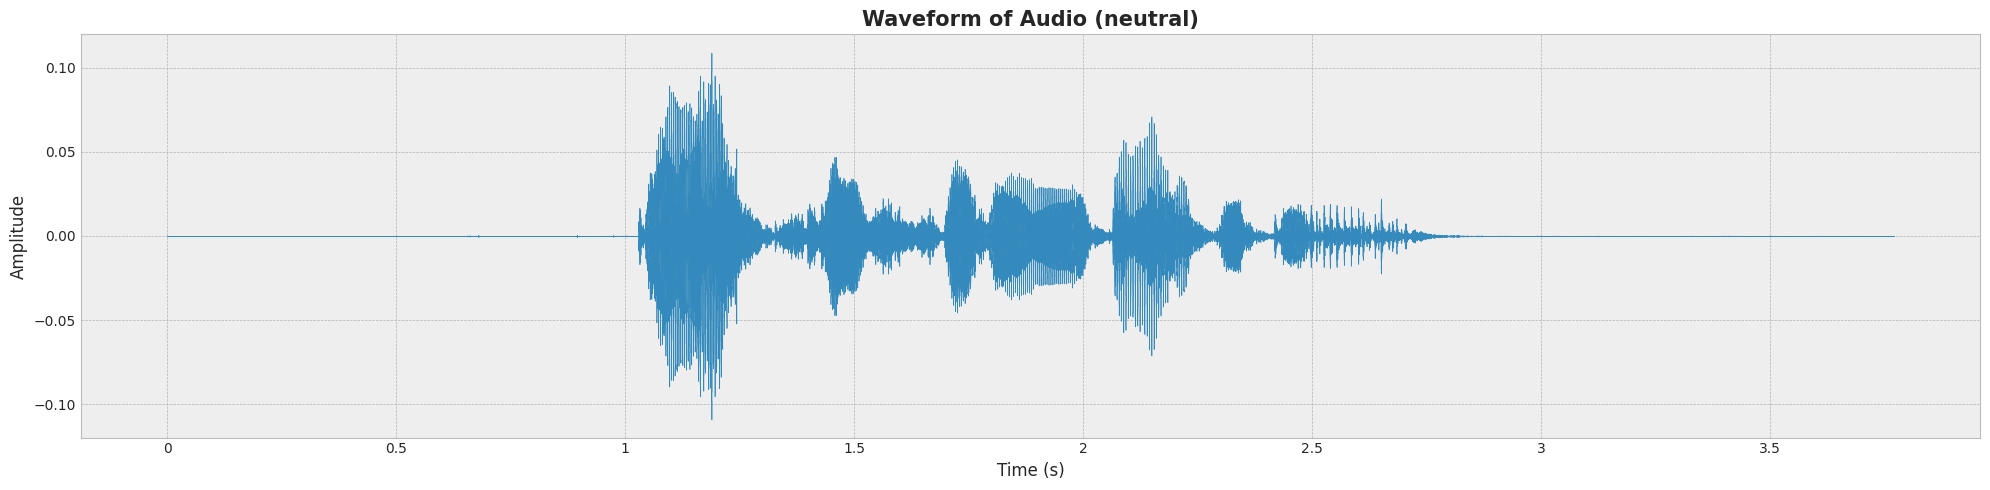

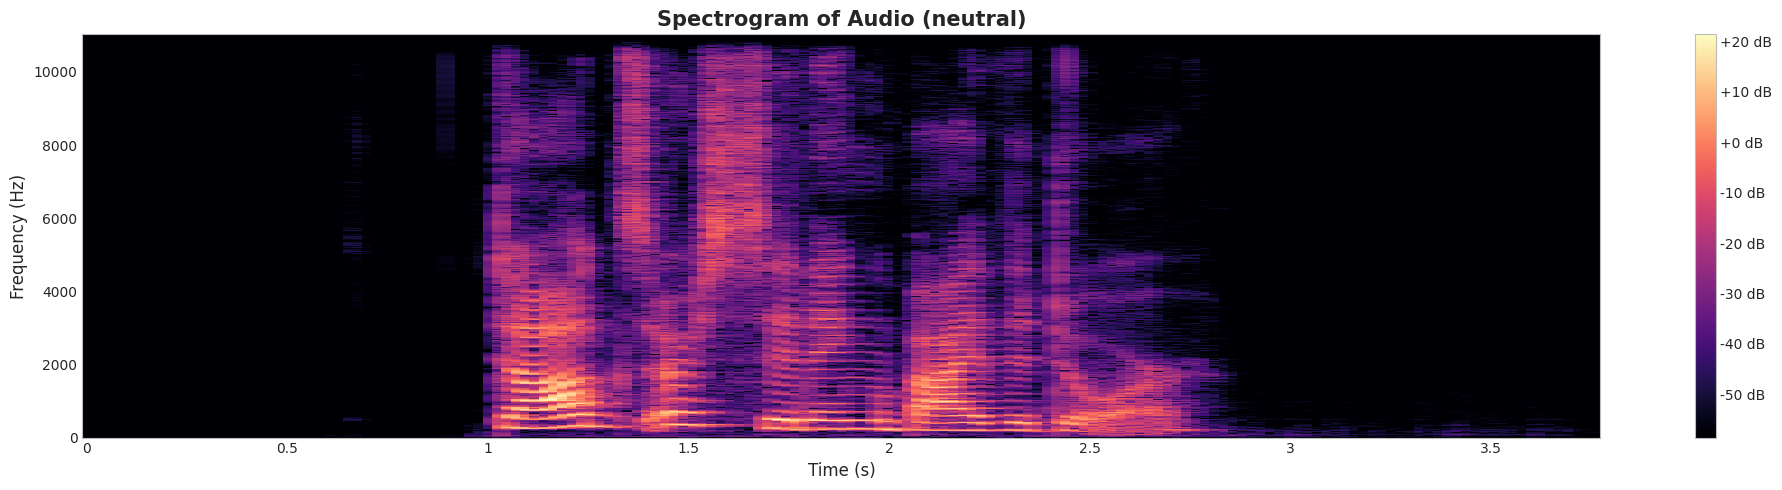

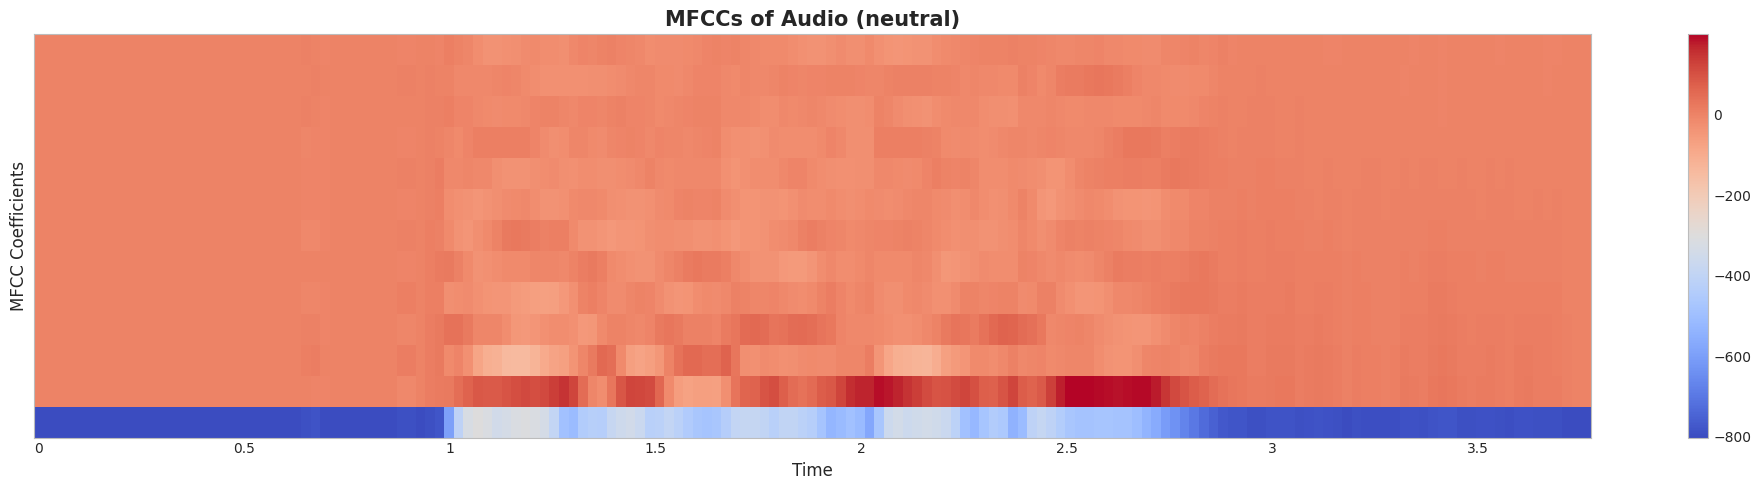

In [22]:
emotion='neutral'
path = np.array(ser_path.Path[ser_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion) 

Audio(path)


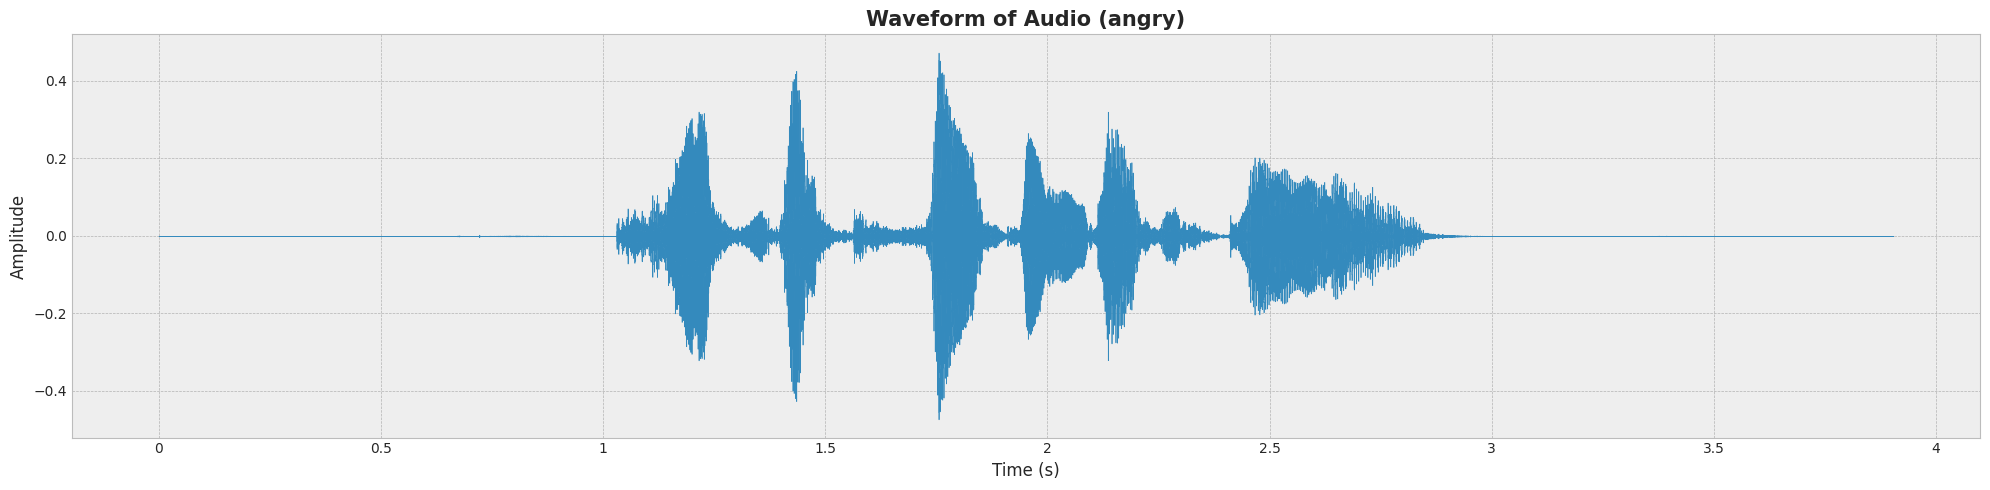

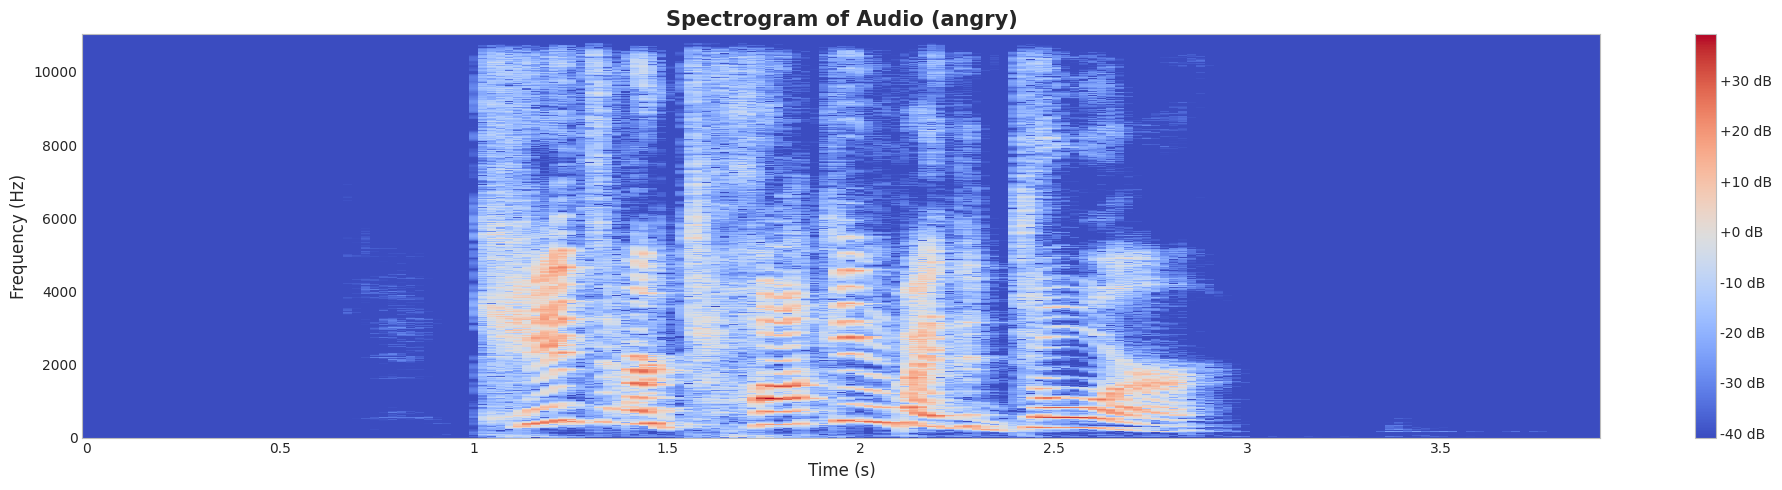

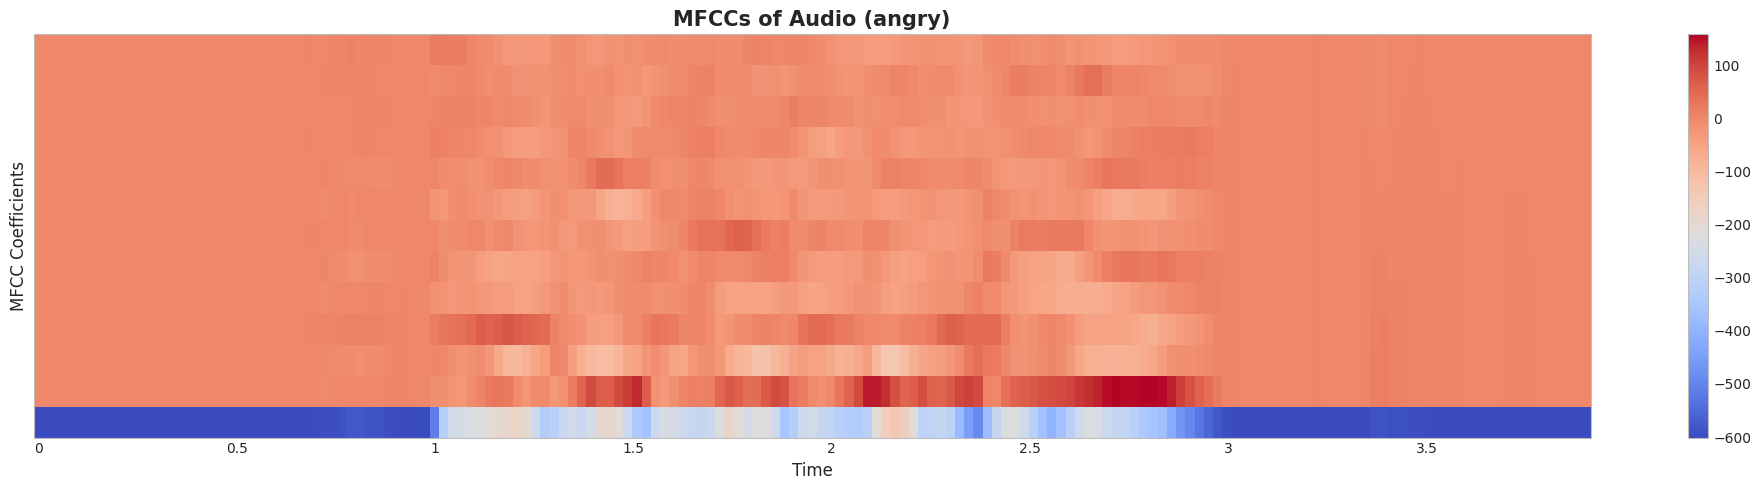

In [23]:
emotion='angry'
path = np.array(ser_path.Path[ser_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

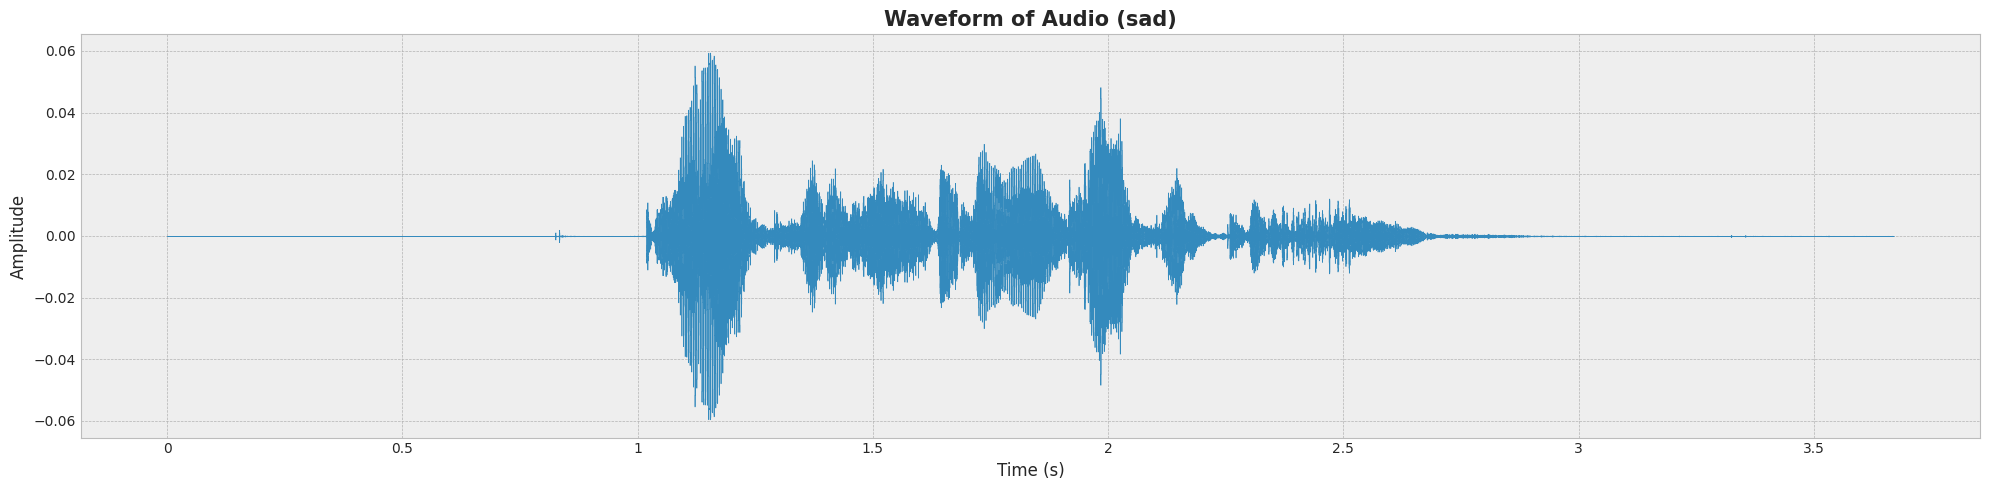

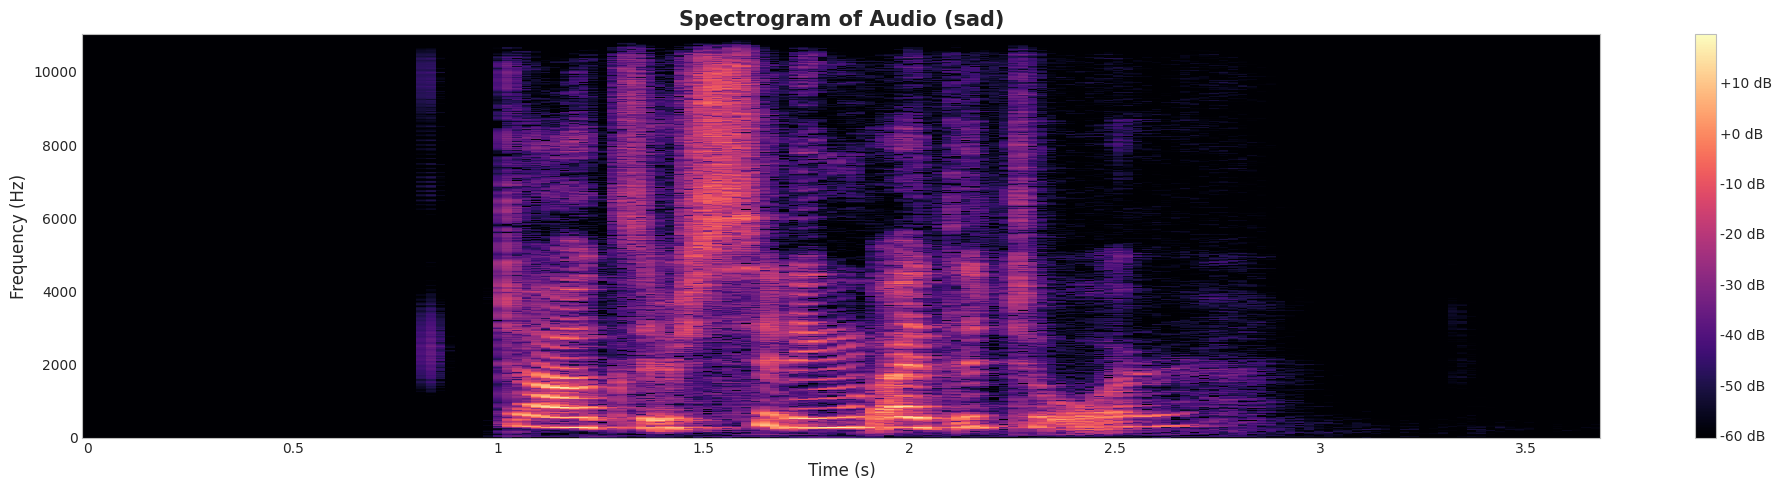

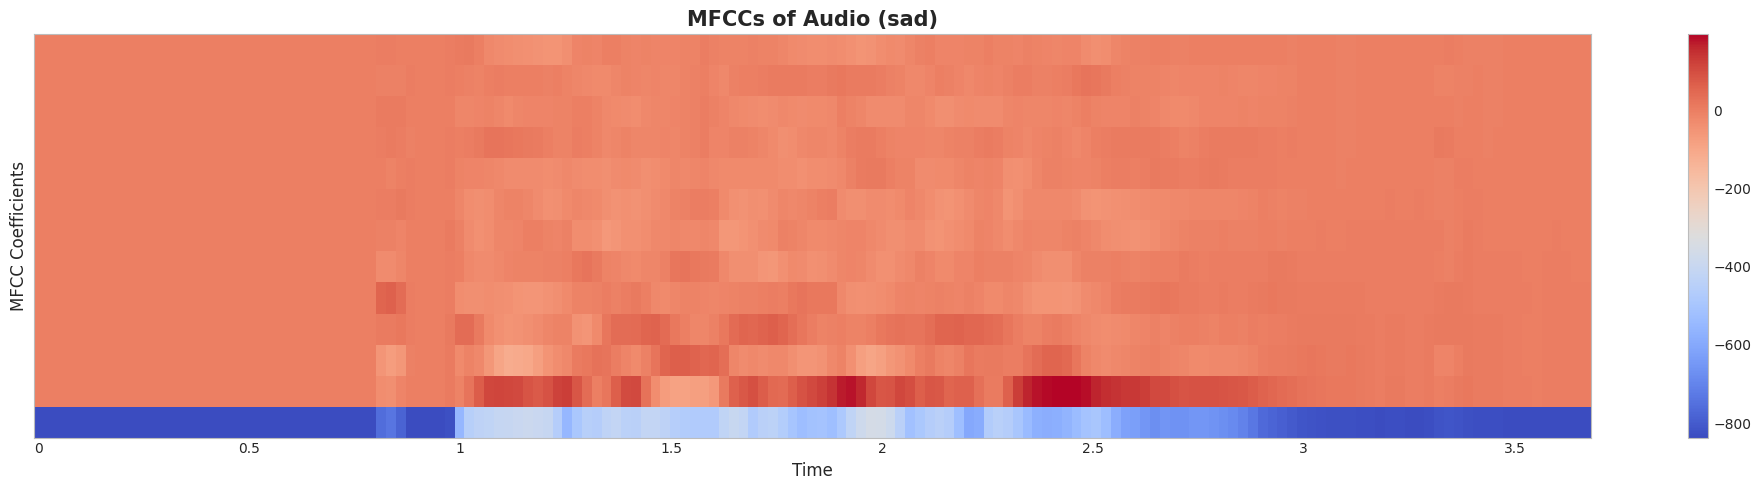

22050


In [24]:
emotion='sad'
path = np.array(ser_path.Path[ser_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion) 
print(sampling_rate) 
Audio(path)

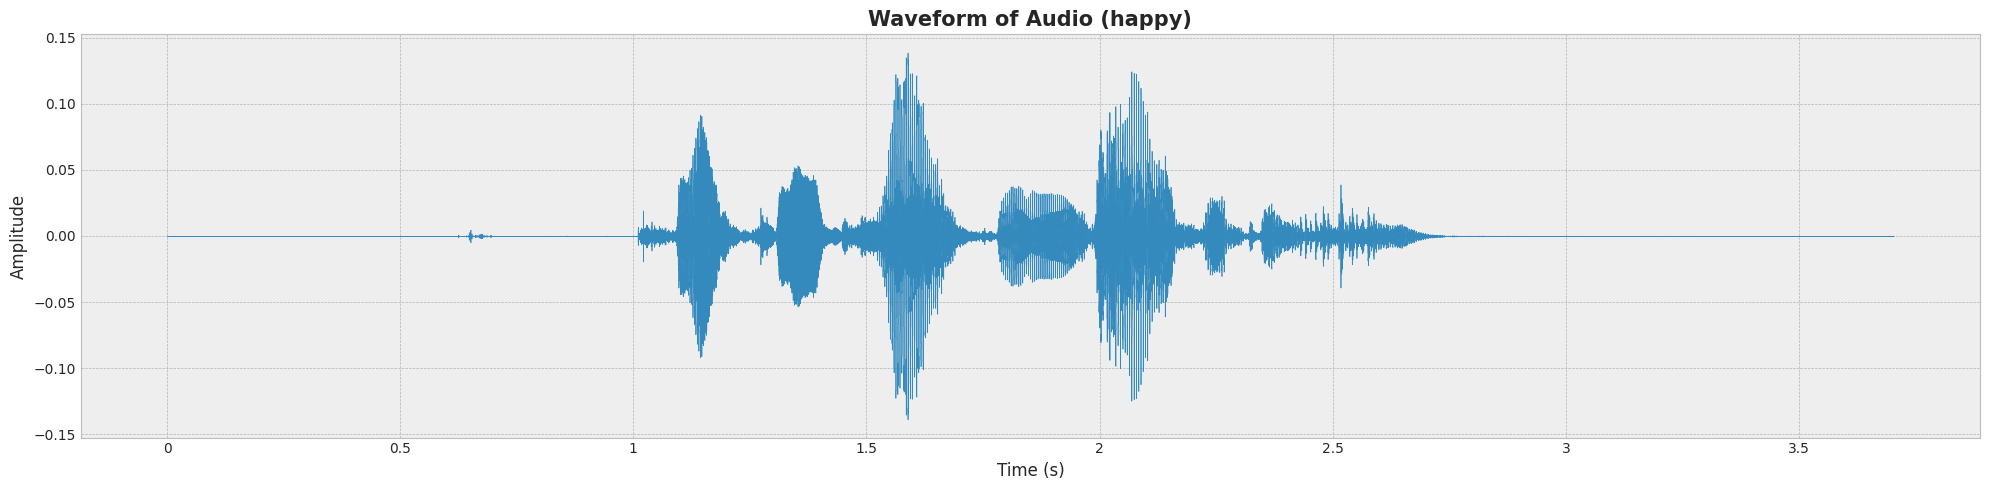

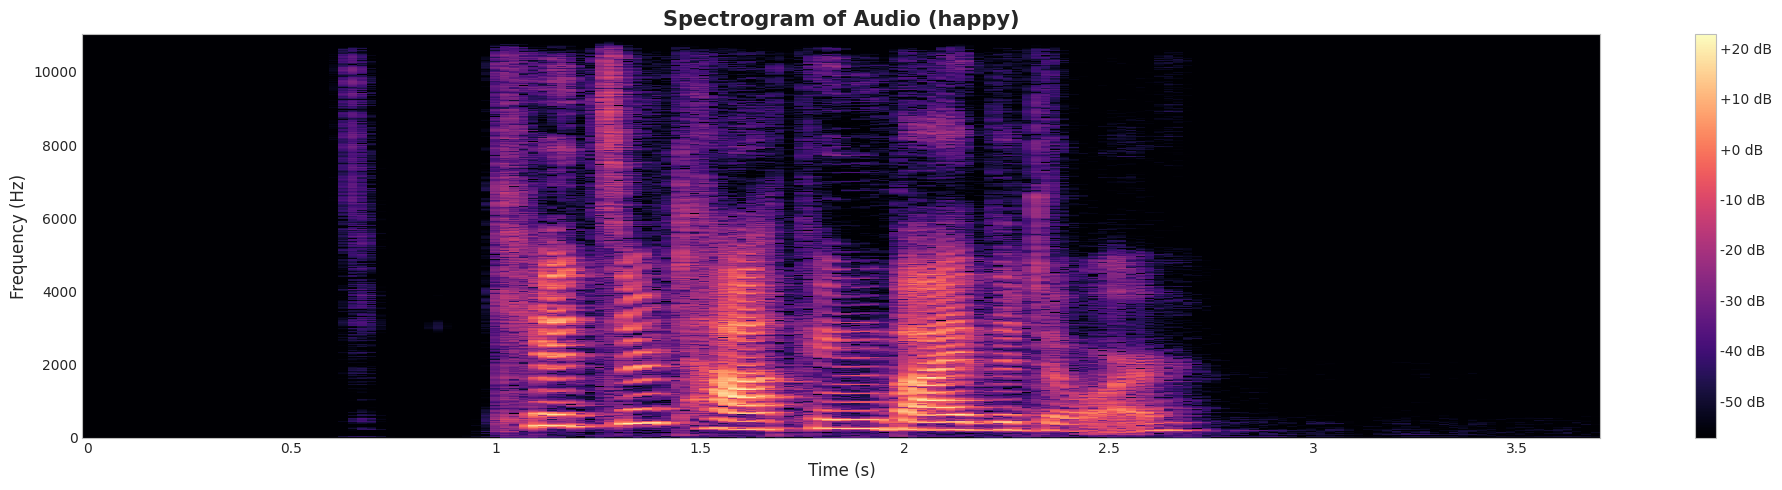

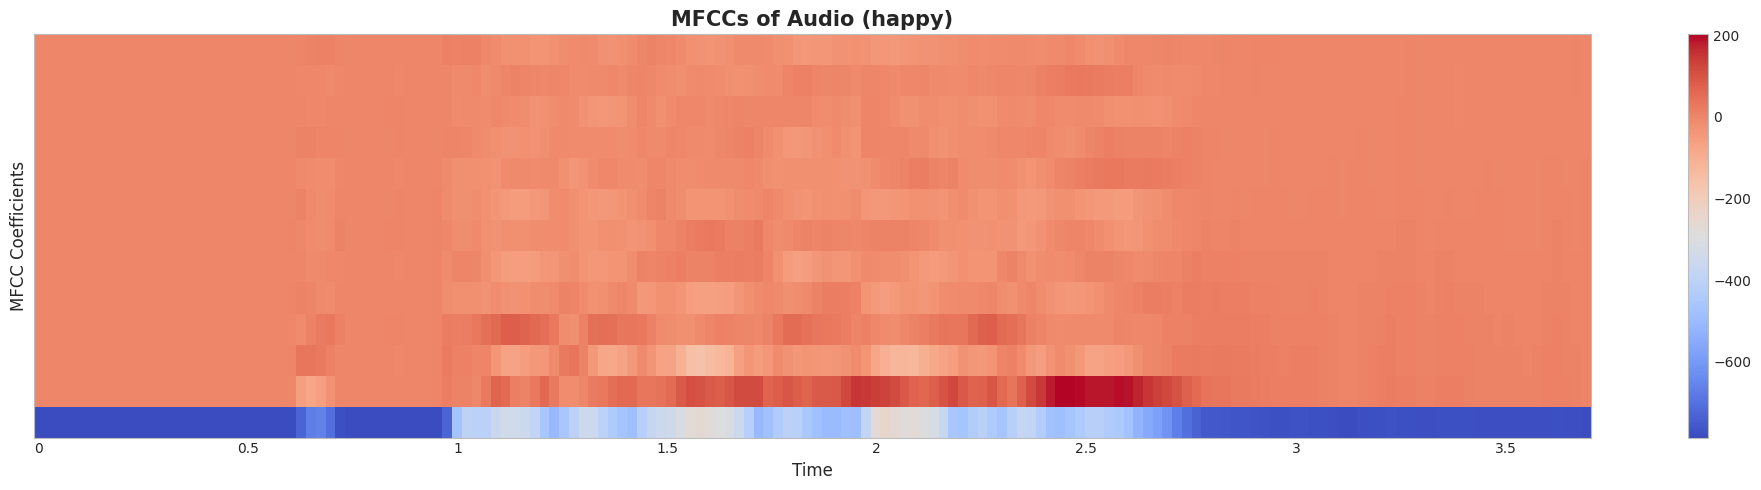

22050


In [25]:
emotion='happy'
path = np.array(ser_path.Path[ser_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
print(sampling_rate) 
Audio(path)

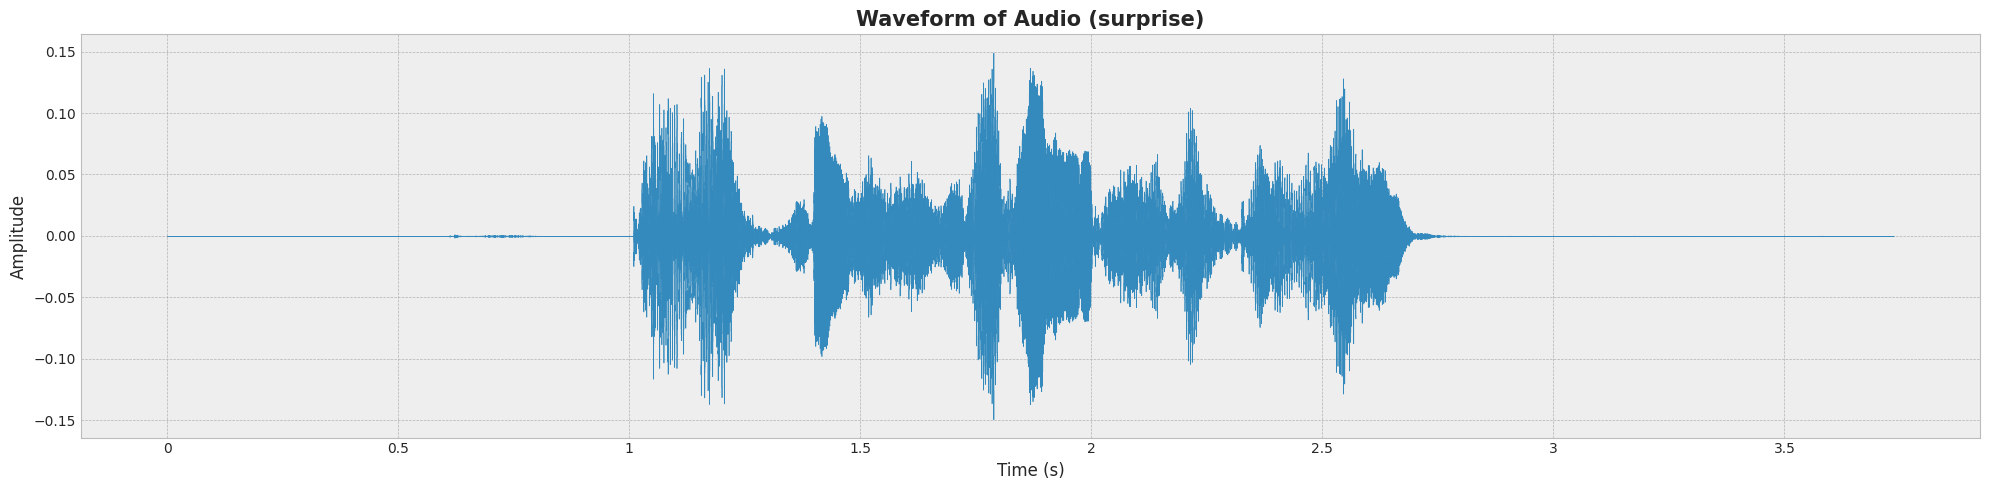

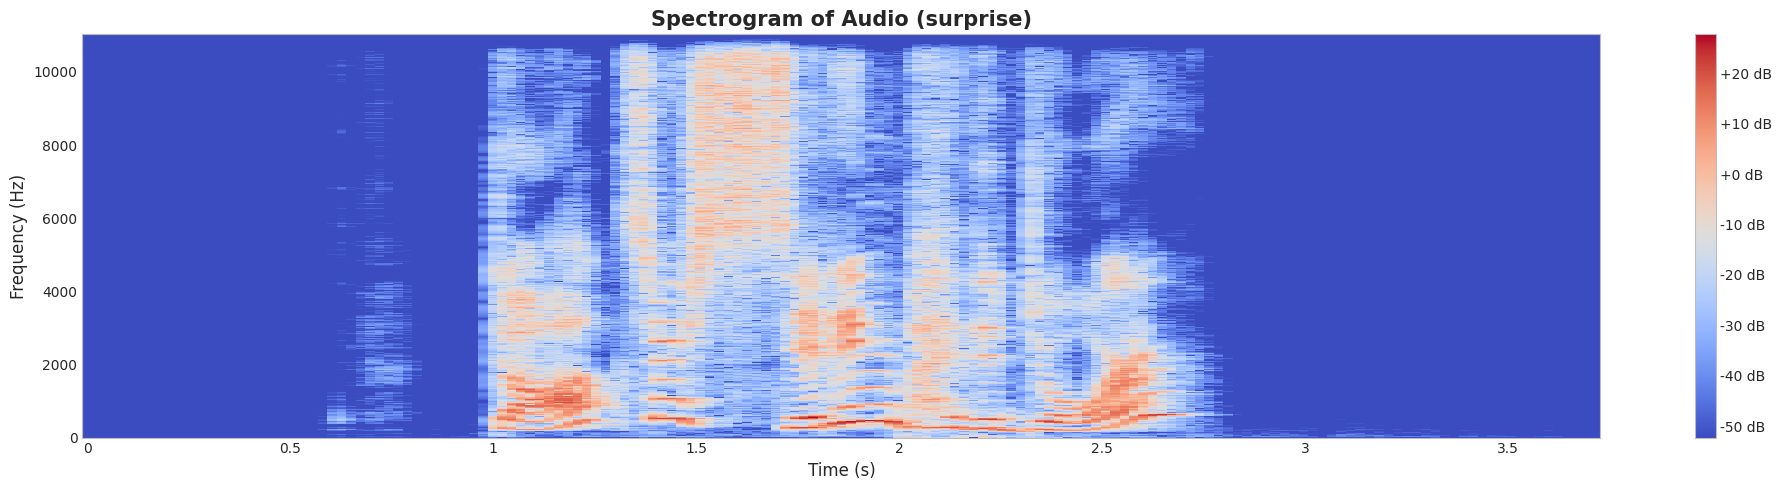

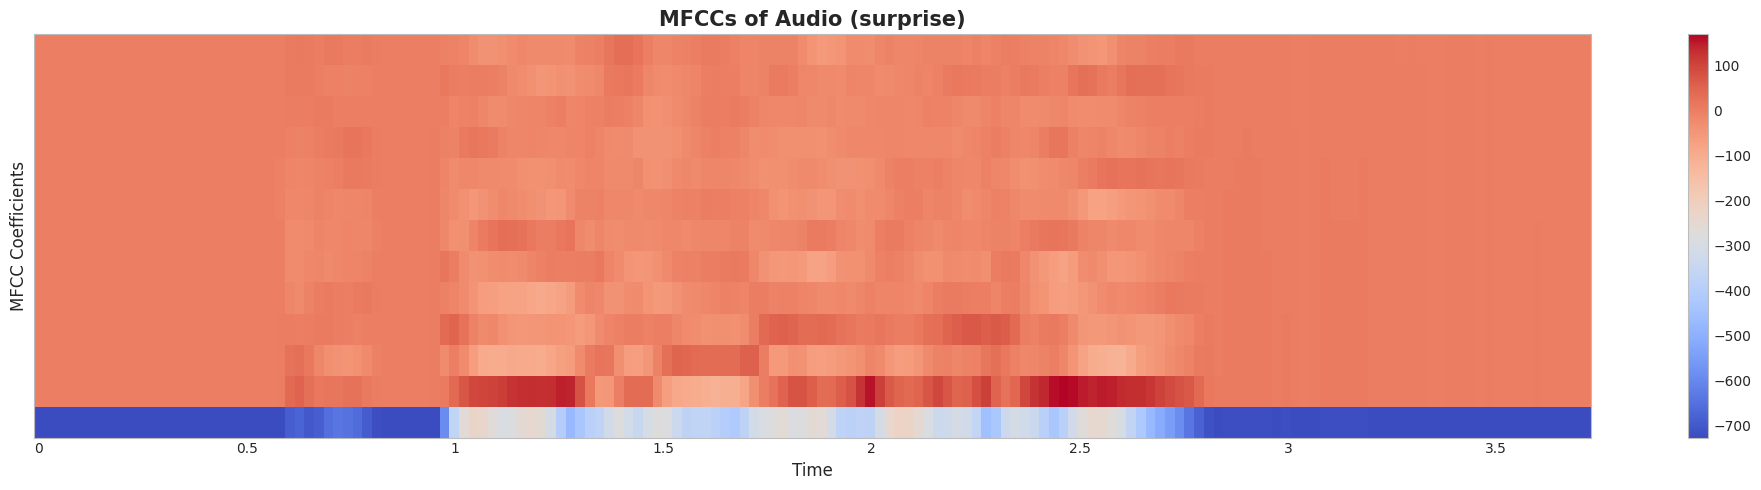

In [26]:
emotion='surprise'
path = np.array(ser_path.Path[ser_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

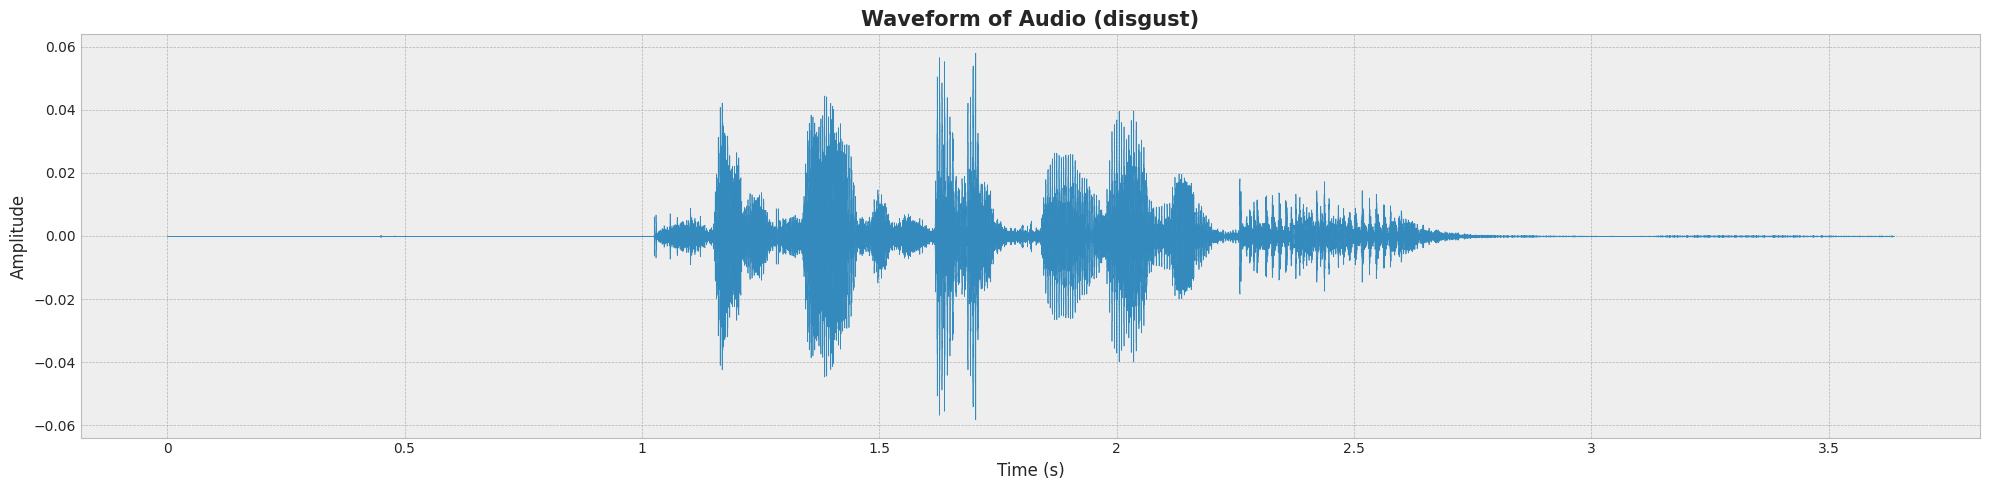

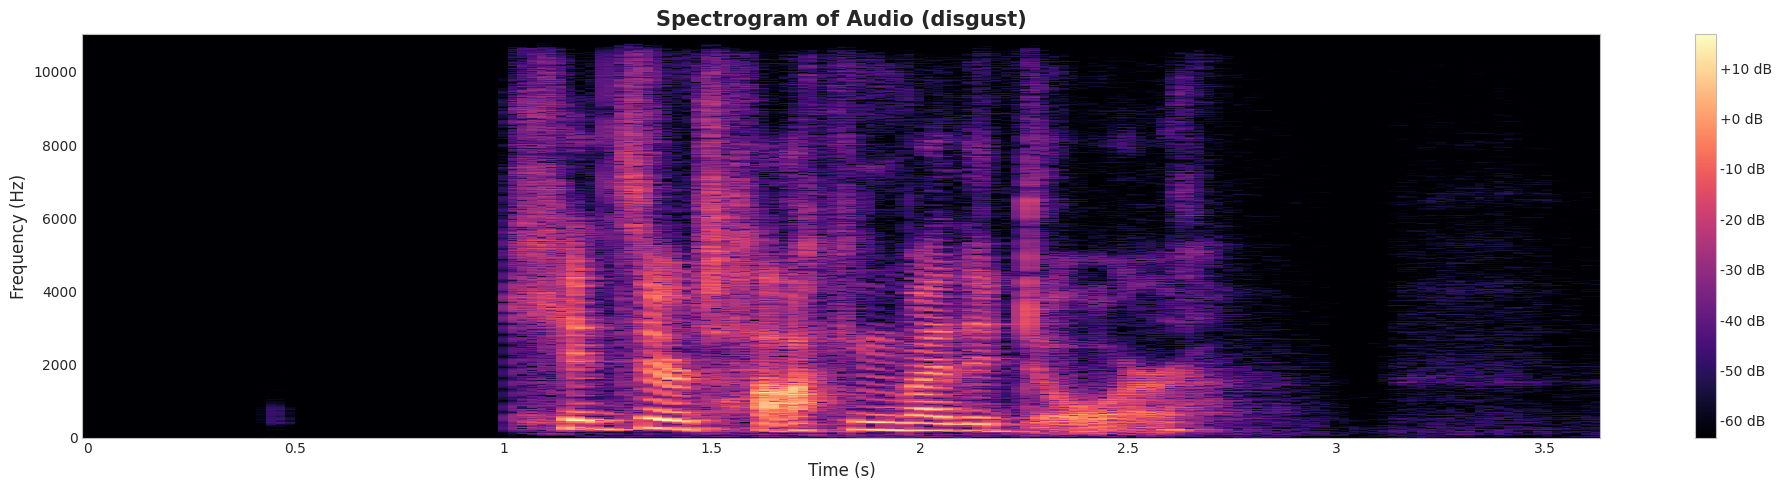

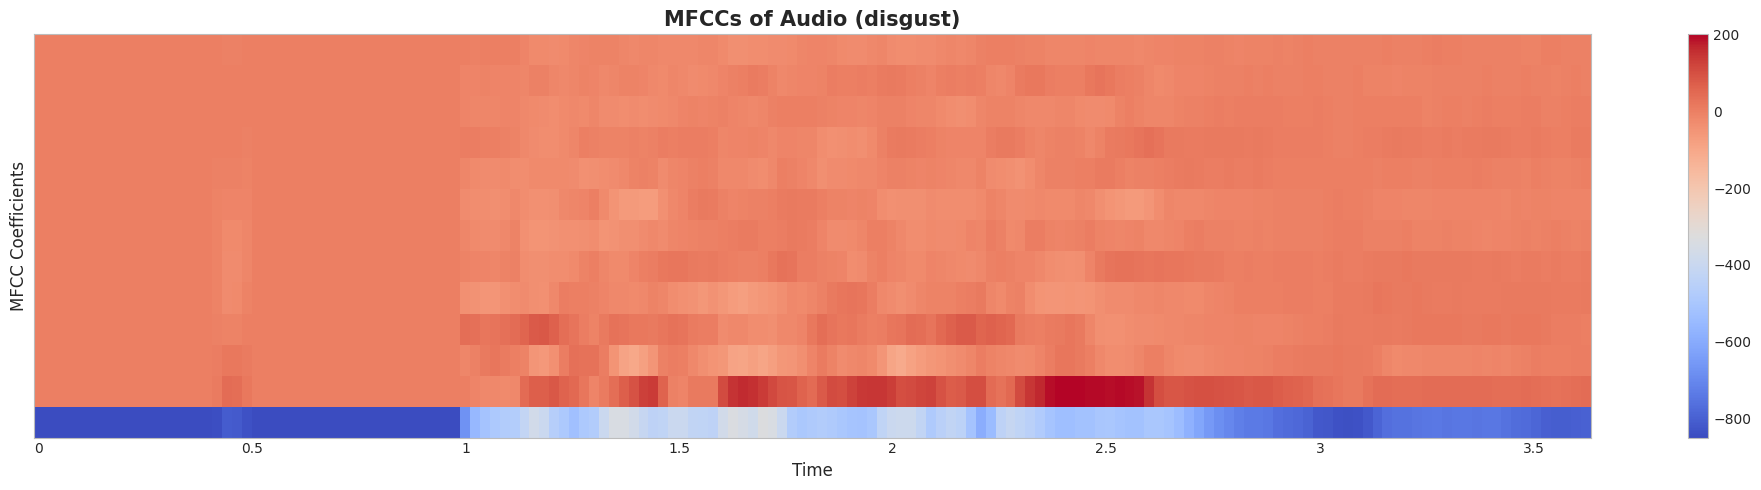

In [27]:
emotion='disgust'
path = np.array(ser_path.Path[ser_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

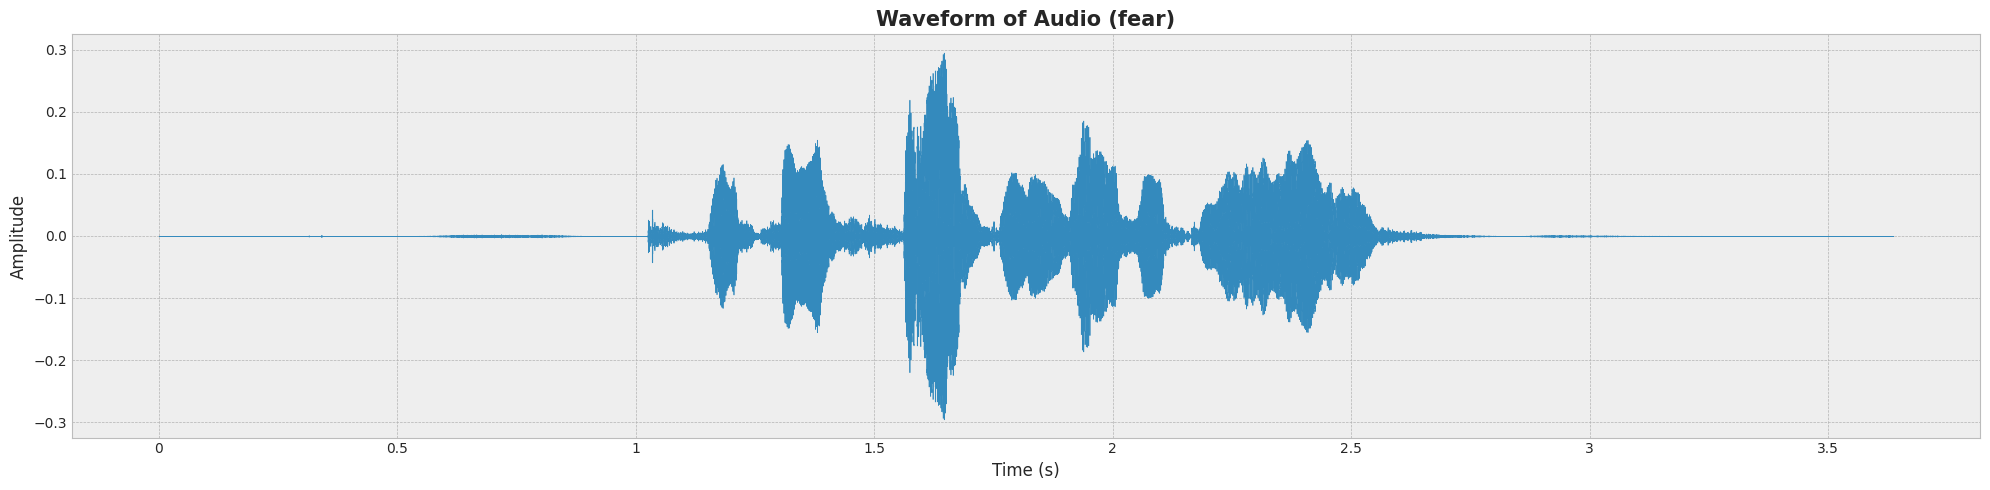

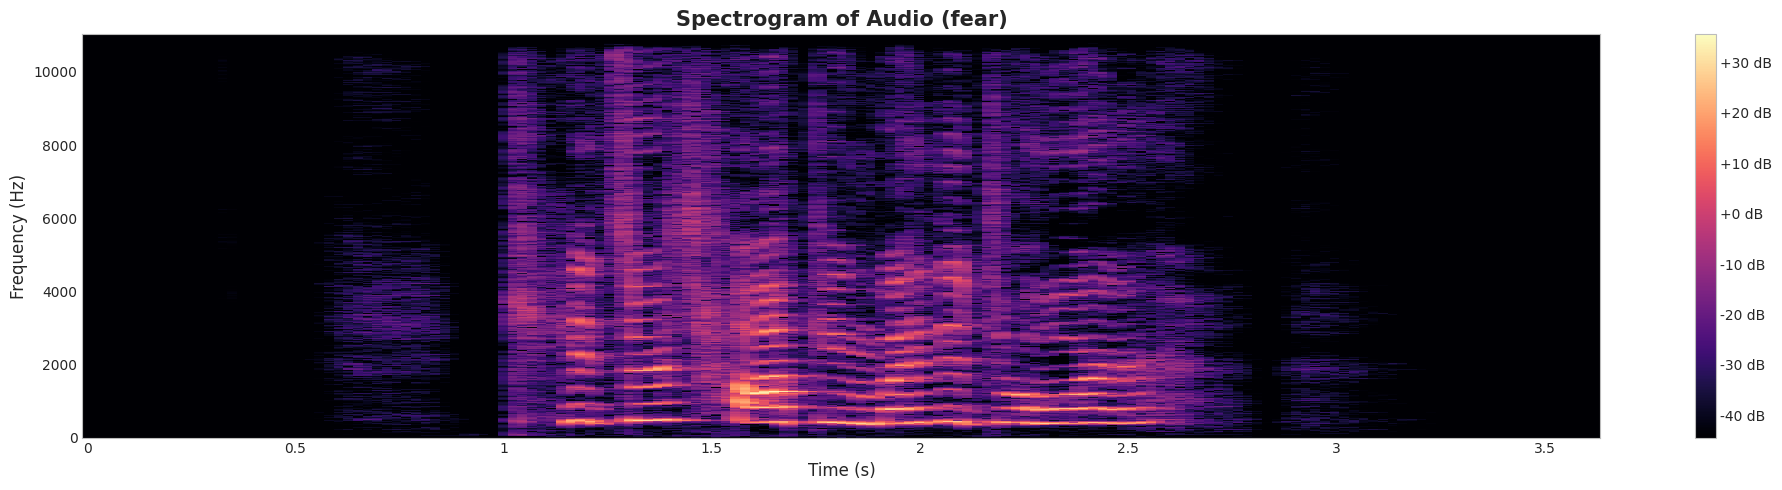

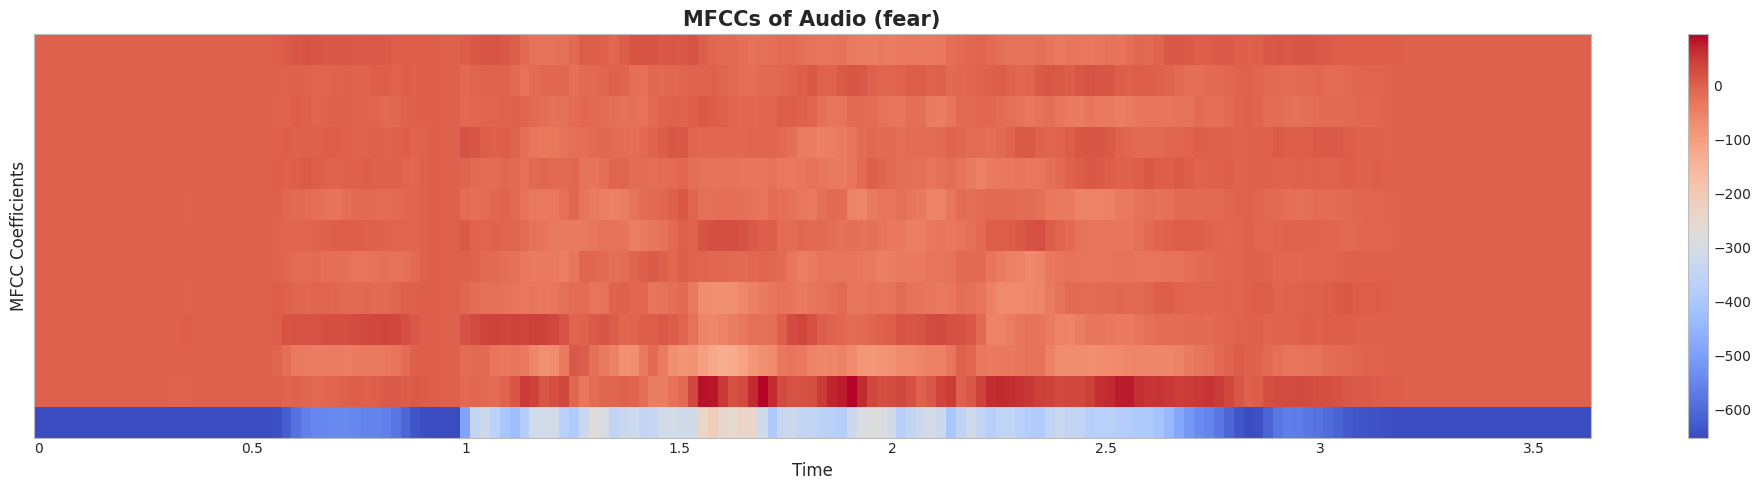

In [28]:
emotion='fear'
path = np.array(ser_path.Path[ser_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

## Audio Data Augmentation 
### increases dataset diversity, improve generalization, and reduce overfitting this includes: 
#### Noise Injection
#### Stretch (speed change)
#### Shift (time shift)
#### Pitch shift

In [29]:
def noise(data,noise_rate=0.01):
    noise_amp = 0.01*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)



path = np.array(ser_path.Path)[2]
data, sample_rate = librosa.load(path)

## Feature Extraction 

In [30]:
def extract_features(data, sr, frame_length=2048, hop_length=512):
    
    result = np.array([])
    
    result = np.hstack(
        
        (result,
        zcr(data, frame_length, hop_length),
        rmse(data, frame_length, hop_length),
        mfcc(data, sr, frame_length, hop_length)
         
                           ))
    return result

 ### The next cell will gives us 4x more data per audio file, which will improves model robustness by first loading one  audio file then extracting features from it next applying data augmentation then extract features again from each augmented version, stack all feature vectors into one matrix and finally returning 4 rows, one row per version 

In [31]:
def get_features(path):
   
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    
    res1 = extract_features(data,sample_rate)
    result = np.array(res1)
    

    noise_data = noise(data)
    res2 = extract_features(noise_data,sample_rate)
    result = np.vstack((result, res2)) 
 
    data_pitch = pitch(data, sample_rate)
    res3 = extract_features(data_pitch,sample_rate)
    result = np.vstack((result, res3)) 
    
   
    data_noise_pitch = noise(data_pitch)
    res4 = extract_features(data_noise_pitch,sample_rate)
    result = np.vstack((result, res4)) 
    
    return result

### This loop will build the full feature matrix (X) and the corresponding emotion labels (Y)

In [32]:
X, Y = [], []

for i, (path, emotion) in enumerate(zip(ser_path.Path, ser_path.Emotions), start=1):

    feature = get_features(path)

    for ele in feature:
        X.append(ele)
        Y.append(emotion)

    # Progress every 1000 files
    if i % 1000 == 0:
        print(f"{i} files processed...")   

1000 files processed...
2000 files processed...
3000 files processed...
4000 files processed...
5000 files processed...
6000 files processed...
7000 files processed...
8000 files processed...
9000 files processed...
10000 files processed...
11000 files processed...
12000 files processed...


In [33]:
len(X), len(Y), ser_path.Path.shape

(48648, 48648, (12162,))

In [34]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head(10)

0         1         2         3         4         5         6  \
0  0.343750  0.479492  0.573730  0.458008  0.375488  0.301758  0.269043   
1  0.244629  0.369629  0.488770  0.485840  0.458496  0.435059  0.405273   
2  0.304199  0.427246  0.540039  0.471191  0.387207  0.333008  0.282227   
3  0.240234  0.366699  0.493164  0.483887  0.481934  0.468262  0.450195   
4  0.437500  0.659668  0.862305  0.878906  0.865234  0.847168  0.845703   
5  0.234375  0.354004  0.478516  0.493652  0.506348  0.510742  0.512695   
6  0.302246  0.432129  0.559082  0.503418  0.480957  0.447266  0.421875   
7  0.248535  0.377441  0.498535  0.510742  0.508789  0.503906  0.502441   
8  0.000000  0.000000  0.000000  0.000000  0.000000  0.063477  0.176758   
9  0.248047  0.375000  0.488281  0.479492  0.482422  0.476074  0.486816   

          7         8         9  ...       2367       2368       2369  \
0  0.255371  0.251465  0.251953  ...  -1.517691  -1.716481  -1.599312   
1  0.382324  0.383301  0.383301  ...   0.448898  -4.187086  -3.865301   
2  0.259277  0.258789  0.252930  ...   0.518303   0.838667   1.308736   
3  0.450195  0.437500  0.436523  ...  -4.917545   3.692249  -1.434574   
4  0.827637  0.835938  0.667969  ...   2.586420   2.746858   2.223281   
5  0.497070  0.490234  0.487305  ...   4.767580   1.913214  -1.137570   
6  0.404297  0.402832  0.416504  ...   5.636772   5.757936   4.936172   
7  0.503418  0.503906  0.497559  ...   0.300533  -3.955902  -0.197011   
8  0.176758  0.254883  0.365723  ...  -1.825546 -24.133352  18.153679   
9  0.488770  0.491211  0.489746  ... -13.208841 -11.219542   4.383537   

        2370       2371       2372      2373      2374      2375    labels  
0  -1.234615  -0.693200  -0.038981  0.675205  1.405603  2.112302  surprise  
1   3.898795   3.977940  -0.344051  0.209346  4.646530  2.947060  surprise  
2   1.855117   2.405196   2.896454  3.283496  3.541684  3.667480  surprise  
3  -4.149691  -1.516700   2.801719  3.303451 -3.935838 -3.662135  surprise  
4   0.986924  -0.730691  -2.530884 -4.002835 -4.849377 -4.929749   neutral  
5  -1.248990  -4.740136  -2.533639 -1.578534 -2.037829 -0.889333   neutral  
6   3.190621   0.719467  -2.071464 -4.604099 -6.261052 -6.591946   neutral  
7  -0.973862  -1.404802   1.375058  2.900296 -0.404688  0.402538   neutral  
8 -15.056423  -7.674026 -13.918604 -5.563489 -7.357308 -0.008655   disgust  
9  -4.136282 -12.851426 -12.536494 -8.080895 -2.185776 -3.562822   disgust  

[10 rows x 2377 columns]

In [35]:
Features = pd.read_csv('features.csv')

In [36]:
print(Features.isna().any())
Features.shape

0         False
1         False
2         False
3         False
4         False
          ...  
2372       True
2373       True
2374       True
2375       True
labels    False
Length: 2377, dtype: bool


(48648, 2377)

In [37]:
Features = Features.fillna(0) 
print(Features.isna().any())
Features.shape

0         False
1         False
2         False
3         False
4         False
          ...  
2372      False
2373      False
2374      False
2375      False
labels    False
Length: 2377, dtype: bool


(48648, 2377)

## Data preparation

### After extracting characteristics and enhancing data, the next step will be to normalize and split the dataset



In [38]:
X = Features.drop('labels',axis=1)
Y = Features['labels']

In [39]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
encoder.categories_

[array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
       dtype=object)]

In [40]:
Features.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2367', '2368', '2369', '2370', '2371', '2372', '2373', '2374', '2375',
       'labels'],
      dtype='object', length=2377)

## Spliting the data into train, validation and test

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X ,Y, test_size=0.15, random_state=30, shuffle=True, stratify=Y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((41350, 2376), (41350, 7), (7298, 2376), (7298, 7))

In [42]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, random_state=30, test_size=0.25, shuffle=True, stratify=y_test)
x_train.shape, x_test.shape, x_val.shape, x_train.shape, x_test.shape, x_val.shape

((41350, 2376),
 (5473, 2376),
 (1825, 2376),
 (41350, 2376),
 (5473, 2376),
 (1825, 2376))

In [43]:
sc = StandardScaler() 

x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val) 
x_test = sc.transform(x_test) 

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((41350, 2376), (41350, 7), (5473, 2376), (5473, 7))

In [44]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_val = np.expand_dims(x_val, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((41350, 2376, 1), (41350, 7), (5473, 2376, 1), (5473, 7))

## Training The Model

In [45]:
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

I0000 00:00:1765208683.057162      96 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765208683.057796      96 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [46]:
model=Sequential()

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))

model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2376, 256)      │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1188, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1188, 256)      │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1188, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 594, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 594, 128)       │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 594, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 297, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 297, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 297, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 297, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 149, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       305,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 841,799 (3.21 MB)

 Trainable params: 840,839 (3.21 MB)

 Non-trainable params: 960 (3.75 KB)

In [47]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)
callbacks=[learning_rate_reduction]

### Begining Training

In [48]:

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    batch_size=64,
    epochs=80,
    callbacks=callbacks
)

Epoch 1/80


I0000 00:00:1765208689.590521     147 service.cc:148] XLA service 0x7df54c002ef0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765208689.591794     147 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1765208689.591814     147 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1765208690.227243     147 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/647 ━━━━━━━━━━━━━━━━━━━━ 1:56:22 11s/step - accuracy: 0.1719 - loss: 2.5107

I0000 00:00:1765208697.145352     147 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


647/647 ━━━━━━━━━━━━━━━━━━━━ 72s 95ms/step - accuracy: 0.3719 - loss: 1.6626 - val_accuracy: 0.4329 - val_loss: 1.3878 - learning_rate: 0.0010
Epoch 2/80
647/647 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - accuracy: 0.5360 - loss: 1.2063 - val_accuracy: 0.5742 - val_loss: 1.0992 - learning_rate: 0.0010
Epoch 3/80
647/647 ━━━━━━━━━━━━━━━━━━━━ 62s 96ms/step - accuracy: 0.5884 - loss: 1.0694 - val_accuracy: 0.5595 - val_loss: 1.1450 - learning_rate: 0.0010
Epoch 4/80
647/647 ━━━━━━━━━━━━━━━━━━━━ 61s 94ms/step - accuracy: 0.6191 - loss: 0.9950 - val_accuracy: 0.6055 - val_loss: 1.0097 - learning_rate: 0.0010
Epoch 5/80
647/647 ━━━━━━━━━━━━━━━━━━━━ 61s 94ms/step - accuracy: 0.6444 - loss: 0.9343 - val_accuracy: 0.6219 - val_loss: 0.9448 - learning_rate: 0.0010
Epoch 6/80
647/647 ━━━━━━━━━━━━━━━━━━━━ 61s 94ms/step - accuracy: 0.6699 - loss: 0.8747 - val_accuracy: 0.6663 - val_loss: 0.8900 - learning_rate: 0.0010
Epoch 7/80
647/647 ━━━━━━━━━━━━━━━━━━━━ 61s 94ms/step - accuracy: 0.6974 - loss: 0.8055

In [49]:
import os
from tensorflow.keras.models import model_from_json



model_name = 'SER_model.keras'
save_dir = os.path.join(os.getcwd(), 'saved_models')


os.makedirs(save_dir, exist_ok=True)


model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print(f"Saved full model at: {model_path}")


weights_path = os.path.join(save_dir, "SER_weights.weights.h5")
model.save_weights(weights_path)
print(f"Saved weights at: {weights_path}")


model_json = model.to_json()
json_path = os.path.join(save_dir, "model_json.json")
with open(json_path, "w") as json_file:
    json_file.write(model_json)
print(f"Saved model architecture at: {json_path}")


Saved full model at: /kaggle/working/saved_models/SER_model.keras
Saved weights at: /kaggle/working/saved_models/SER_weights.weights.h5
Saved model architecture at: /kaggle/working/saved_models/model_json.json


## Model Evaluation Process 

In [50]:
print("Accuracy of the model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9400 - loss: 0.1947
Accuracy of the model on test data :  94.13484334945679 %


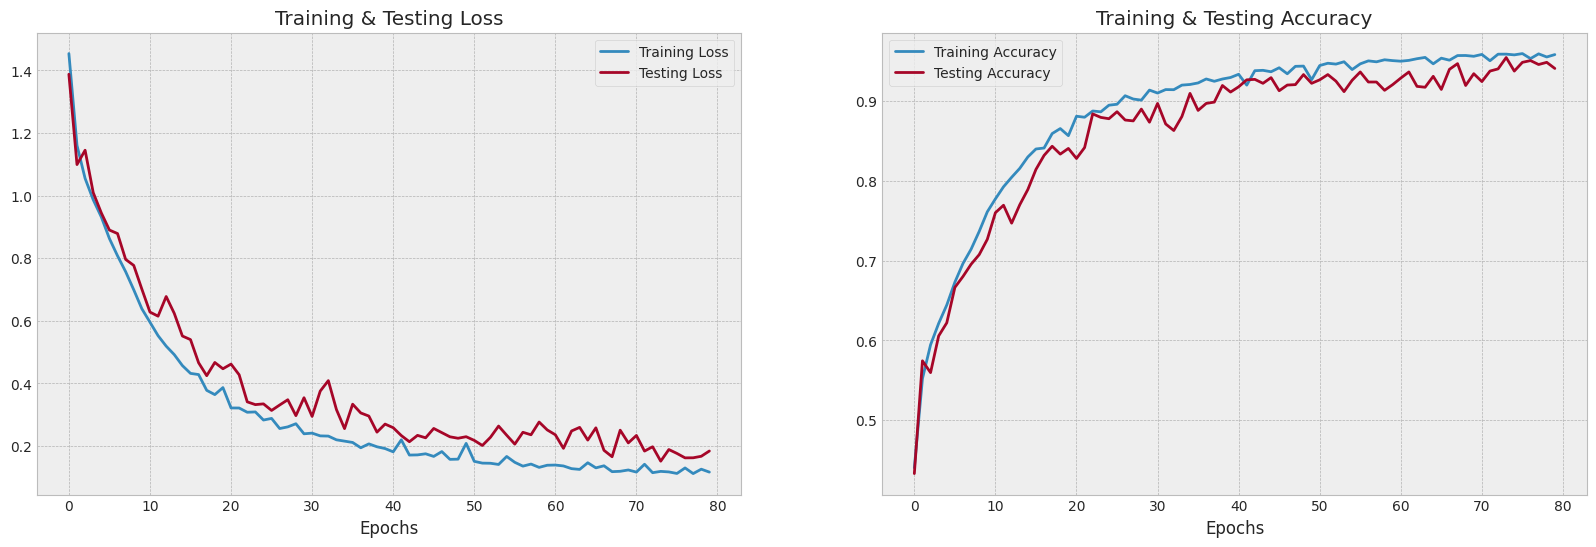

In [51]:
epochs = [i for i in range(80) ]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [52]:
pred_test = model.predict(x_test)

y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


In [53]:
pred_test=model.predict(x_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


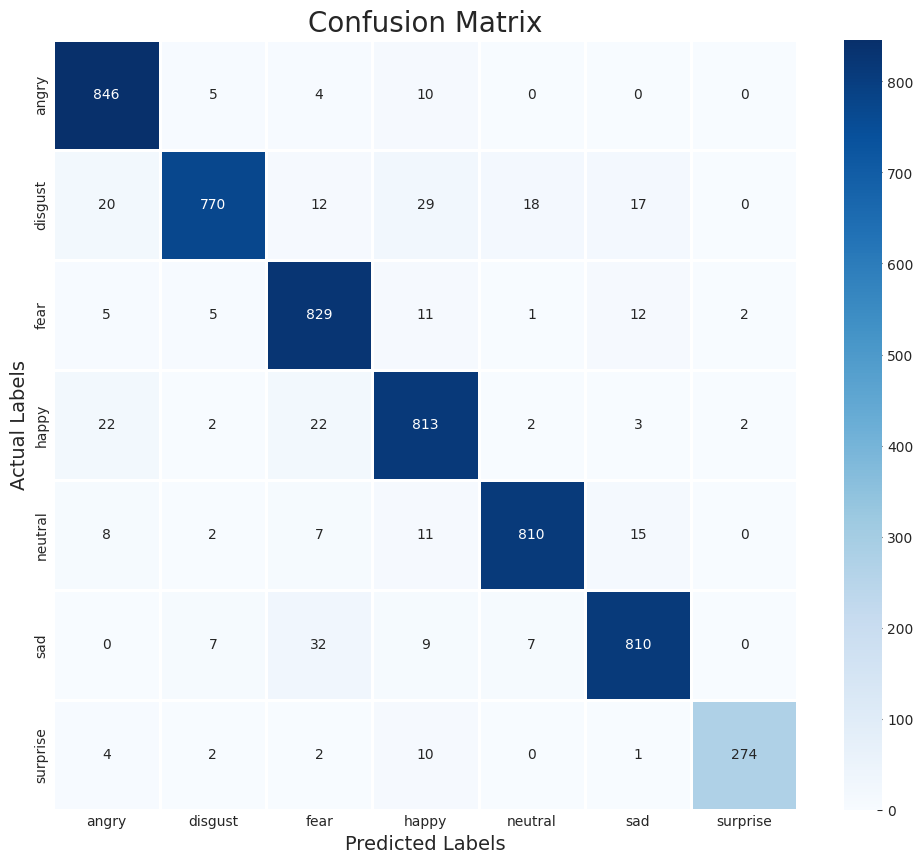

In [54]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.93      0.98      0.96       865
     disgust       0.97      0.89      0.93       866
        fear       0.91      0.96      0.94       865
       happy       0.91      0.94      0.92       866
     neutral       0.97      0.95      0.96       853
         sad       0.94      0.94      0.94       865
    surprise       0.99      0.94      0.96       293

    accuracy                           0.94      5473
   macro avg       0.95      0.94      0.94      5473
weighted avg       0.94      0.94      0.94      5473

